In [64]:
# Mengimport Library yang akan digunakan
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import data
from skimage.io import imread
from skimage.color import rgb2gray 

In [65]:
#   Fungsi untuk memberikan noise pada gambar yg jernih
def add_salt_and_pepper_noise(image, proporsi):
    noisy_image = image.copy()                      # Copy image
    noise = np.zeros(image.shape[:2], np.uint8)     # Membuat array kosong untuk menampung hasil noise
    cv2.randu(noise, 0, 255)                        # Memanggil fungsi cv2.randu untuk menghasilkan noise salt and pepper

    # Mengubah piksel menjadi nilai putih atau hitam berdasarkan proporsi
    noisy_image[noise < proporsi * 255 / 2] = 0  # Mengubah piksel menjadi hitam (noise pepper)
    noisy_image[noise > 255 - proporsi * 255 / 2] = 255  # Mengubah piksel menjadi putih (noise salt)

    return noisy_image

proporsi = 0.15 # Proporsi noise yang diinginkan 

Shape citra 1 :  (1080, 1080)
Shape citra 2 :  (1080, 1080)


Text(0.5, 1.0, 'Citra 2')

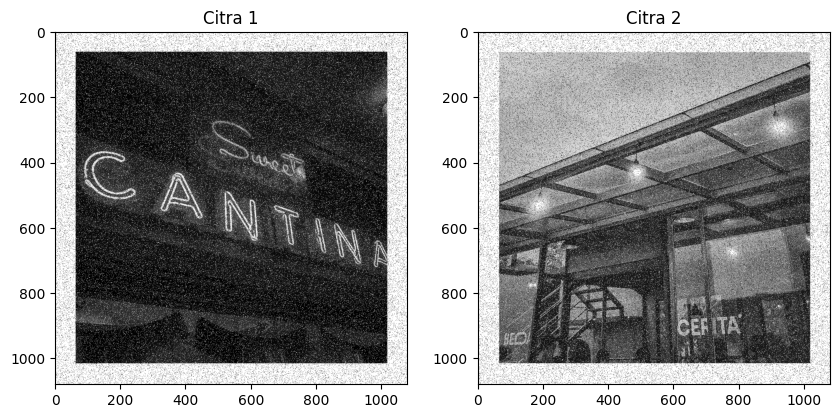

In [66]:
citra1 = imread(fname="images/Sweet.jpg")           # Membaca citra dengan nama file "Sweet.jpg" menggunakan fungsi imread()
citra1 = cv2.cvtColor(citra1, cv2.COLOR_RGB2GRAY)   # Konversi citra menjadi citra skala abu-abu 
citra1_noisy = add_salt_and_pepper_noise(citra1, proporsi)

citra2 = imread(fname="images/Story.png")       # Membaca citra dengan nama file "Story.png"" menggunakan fungsi imread()
citra2 = cv2.cvtColor(citra2, cv2.COLOR_RGB2GRAY)   # Konversi citra menjadi citra skala abu-abu 
citra2_noisy = add_salt_and_pepper_noise(citra2, proporsi)

# Print informasi dimensi citra
print('Shape citra 1 : ', citra1.shape)
print('Shape citra 2 : ', citra2.shape)

# Membuat figure subplot  dengan ukuran 1 baris dan 2 kolom
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
ax = axes.ravel()

# Menampilkan citra 1 dan citra 2
ax[0].imshow(citra1_noisy, cmap = 'gray')
ax[0].set_title("Citra 1")
ax[1].imshow(citra2_noisy, cmap = 'gray')
ax[1].set_title("Citra 2")

In [67]:
#   CODE ASAL MATLAB

#proses filter rerata untuk citra mobil
#F2 = double(inputMobil);
#for baris=2 : tinggiA-1
#    for kolom=2 : lebarA-1
#        jum = F2(baris-1, kolom-1)+ F2(baris-1, kolom) + F2(baris-1, kolom-1) + ...
#              F2(baris, kolom-1) + F2(baris, kolom) + F2(baris, kolom+1) + ...
#              F2(baris+1, kolom-1) + F2(baris+1, kolom) + F2(baris+1, kolom+1);         
#         outputMobil(baris, kolom) = uint8(1/9 * jum);
#    end
#end

In [68]:
copyCitra1 = citra1_noisy.copy().astype(float)    # Membuat salinan dari citra citra1 dan citra2 dan mengubah tipe data citra menjadi float
copyCitra2 = citra2_noisy.copy().astype(float)

m1, n1 = copyCitra1.shape                   # Mengambil dimensi baris (m1) dan dimensi kolom (n1) dari copyCitra1
output1 = np.empty([m1, n1])                # Membuat matriks kosong dengan ukuran m1 baris dan n1 kolom
m2, n2 = copyCitra2.shape                   # Mengambil dimensi baris (m2) dan dimensi kolom (n2) dari copyCitra2
output2 = np.empty([m2, n2])                # Membuat matriks kosong dengan ukuran m2 baris dan n2 kolom

# Print informasi dimensi citra copyCitra1 dan dimensi citra output output1
print('Shape copy citra 1 : ', copyCitra1.shape)
print('Shape output citra 1 : ', output1.shape)

# Print nilai m1 dan n1 untuk memberikan informasi tentang jumlah baris dan jumlah kolom secara terpisah
print('m1 : ', m1)
print('n1 : ', n1)
print()

# Print informasi dimensi citra copyCitra2 dan dimensi citra output output2
print('Shape copy citra 2 : ', copyCitra2.shape)
print('Shape output citra 3 : ', output2.shape)

# Print nilai m1 dan n1 untuk memberikan informasi tentang jumlah baris dan jumlah kolom secara terpisah
print('m2 : ',m2)
print('n2 : ',n2)
print()

Shape copy citra 1 :  (1080, 1080)
Shape output citra 1 :  (1080, 1080)
m1 :  1080
n1 :  1080

Shape copy citra 2 :  (1080, 1080)
Shape output citra 3 :  (1080, 1080)
m2 :  1080
n2 :  1080



In [69]:
#   FILTERING INPUT 1

# Melakukan perulangan pada setiap baris dari 0 hingga m1-1. 
for baris in range(0, m1-1):
    # Melakukan perulangan pada setiap kolom dari 0 hingga n1-1. Variabel
    for kolom in range(0, n1-1):
        # Menginisialisasi variabel a1 dengan nilai baris dan variabel b1 dengan nilai kolom 
        a1 = baris
        b1 = kolom
        # Menghitung jumlah elemen-elemen sekitar pada copyCitra1
        jumlah = copyCitra1[a1-1, b1-1] + copyCitra1[a1-1, b1] + copyCitra1[a1-1, b1-1] + \
                 copyCitra1[a1, b1-1] + copyCitra1[a1, b1] + copyCitra1[a1, b1+1] + \
                 copyCitra1[a1+1, b1-1] + copyCitra1[a1+1, b1] + copyCitra1[a1+1, b1+1];  
        # Menyimpan hasil perhitungan rata-rata dalam matriks output1, nilai rata-rata dihitung dengan membagi jumlah dengan 9
        output1[a1, b1] = (1/9 * jumlah)

In [70]:
#   FILTERING INPUT 2

# Melakukan iterasi pada setiap baris dari 0 hingga m2-1. 
for baris in range(0, m2-1):
    # Melakukan iterasi pada setiap kolom dari 0 hingga n2-1. Variabel
    for kolom in range(0, n2-1):
        # Menginisialisasi variabel a2 dengan nilai baris dan variabel b2 dengan nilai kolom 
        a2 = baris
        b2 = kolom
        # Menghitung jumlah elemen-elemen sekitar pada copyCitra1
        jumlah = copyCitra2[a2-1, b2-1] + copyCitra2[a2-1, b2] + copyCitra2[a2-1, b2-1] + \
                 copyCitra2[a2, b2-1] + copyCitra2[a2, b2] + copyCitra2[a2, b2+1] + \
                 copyCitra2[a2+1, b2-1] + copyCitra2[a2+1, b2] + copyCitra2[a2+1, b2+1];  
        # Menyimpan hasil perhitungan rata-rata dalam matriks output2, rata-rata dihitung dengan membagi jumlah dengan 9
        output2[a2, b2] = (1/9 * jumlah)

Text(0.5, 1.0, 'Output Citra 2')

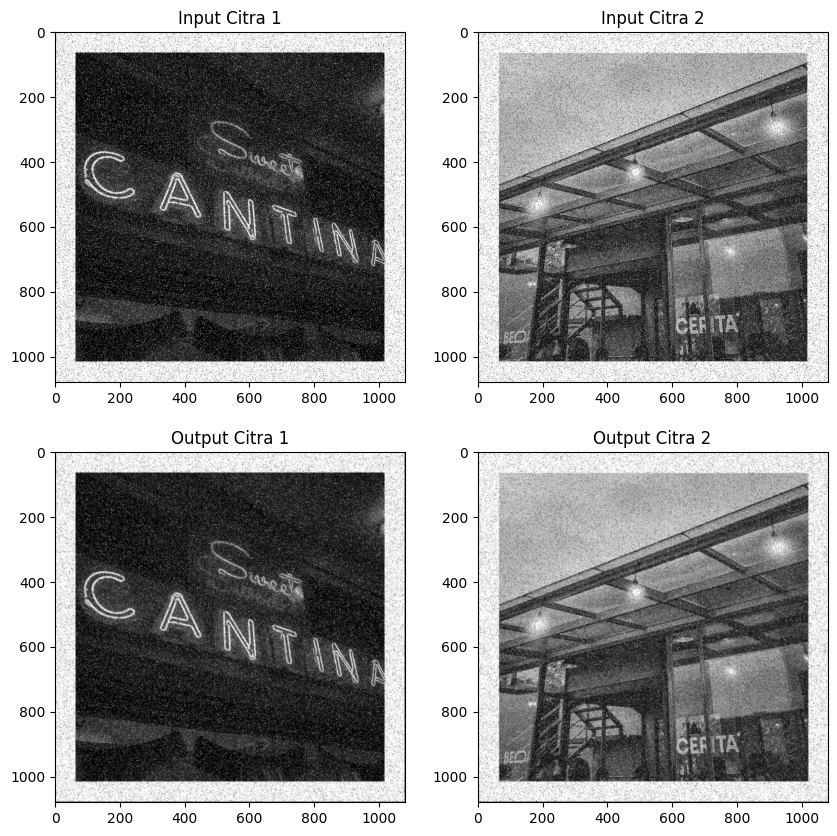

In [71]:
#   PLOTTING IMAGE
fig, axes = plt.subplots(2, 2, figsize=(10, 10))    # Membuat figure subplot  dengan ukuran 2 baris dan 2 kolom
ax = axes.ravel()                                   # Meratakan array axes menjadi satu dimensi.

ax[0].imshow(citra1_noisy, cmap = 'gray')           # Menampilkan hasil input citra 1
ax[0].set_title("Input Citra 1")

ax[1].imshow(citra2_noisy, cmap = 'gray')           # Menampilkan hasil input citra 2
ax[1].set_title("Input Citra 2")

ax[2].imshow(output1, cmap = 'gray')                # Menampilkan hasil output citra 1
ax[2].set_title("Output Citra 1")

ax[3].imshow(output2, cmap = 'gray')                # Menampilkan hasil output citra 2
ax[3].set_title("Output Citra 2")